In [1]:
from vis_utils.visualization import *
from heatmap_model.utils import ComputeError
from scipy.spatial.distance import cdist, euclidean
import pickle
data = np.load('./results/val_uncertainty_f.npz', allow_pickle=True)
Umv = data['epistemic']
Uav = data['aleatoric']
datat = np.load('./results/test_ust.npz', allow_pickle=True)
Umt = datat['epistemic']
Uat = datat['aleatoric']

In [2]:
# data = np.load('./results/test_st.npz', allow_pickle=True)
# Ht = data['heatmap']
# Yt = data['points']
datav = np.load('./results/val_results_f.npz', allow_pickle=True)
Hv = datav['heatmap']
Yv = datav['points']
# visdata = np.load('./interaction_merge/test.npz', allow_pickle=True)
# origint = visdata['origin']
# radiant = visdata['radian']
# visdatav = np.load('./interaction_merge/vis_val.npz', allow_pickle=True)
# originv = visdatav['origin']
# radianv = visdatav['radian']

In [ ]:
U_aleatoric = np.concatenate([Uat, Uav])
U_epistemic = np.concatenate([Umt, Umv])
H = np.concatenate([Ht, Hv], axis=0)
Y = np.concatenate([Yt, Yv], axis=0)
origin = np.concatenate([origint, originv], axis=0)
radian = np.concatenate([radiant, radianv])
print(H.shape, Y.shape, origin.shape, radian.shape)

In [ ]:
with open('./interaction_data/data/reference/test_index.pickle', 'rb') as handle:
    s = pickle.load(handle)
caselist, carid = s[0], s[1]
filenames = os.listdir('./interaction_data/data/test/')
filenames.sort()

csvfilest = [filenames[int(c[:-6])-1] for c in caselist]
case_idt = [int(c[-6:]) for c in caselist]
track_idt = [int(c) for c in carid]

with open('./interaction_data/data/reference/val_index.pickle', 'rb') as handle:
    s = pickle.load(handle)
caselist, carid = s[0], s[1]
filenames = os.listdir('./interaction_data/data/val/')
filenames.sort()

csvfilesv = [filenames[int(c[:-6])-1] for c in caselist]
case_idv = [int(c[-6:]) for c in caselist]
track_idv = [int(c) for c in carid]

csvfiles = csvfilest+csvfilesv
case_id = case_idt+case_idv
track_id = track_idt+track_idv

In [ ]:
DATA = {
    'files': csvfiles,
    'case_id': case_id,
    'track_id': track_id
}

In [ ]:
with open('reference.pickle', 'wb') as f:
    pickle.dump(DATA, f)

In [ ]:
np.savez_compressed('DATA', heatmap=H, prediction=Y, aleatoric=U_aleatoric/np.amax(U_aleatoric), epistemic=U_epistemic/np.amax(U_epistemic), origin=origin, radian=radian)

In [ ]:
x = np.arange(0,46,0.5)
y = np.arange(0,87,0.5)
xc, yc = np.meshgrid(x,y)
xr = xc.T
yr = yc.T
X = np.stack([xc, yc], -1).reshape((-1,2))

In [3]:
with open('./interaction_data/data/reference/test_index.pickle', 'rb') as handle:
    s = pickle.load(handle)
caselist, carid = s[0], s[1]

file_id = [int(case[:-6])-1 for case in caselist]
filenames = os.listdir('./interaction_data/data/test/')
filenames.sort()

#track_id = int(carid[index])
#file_to_read = filenames[file_id]
D = np.load('./interaction_merge/val.npz', allow_pickle=True)
Y = D['intention']
Dv = np.load('./results/val_results_f.npz', allow_pickle=True)
Yp = Dv['points']

In [ ]:
Visualize(index=np.argsort(Umt)[-4], title='Um='+str(round(Umt[np.argsort(Umt)[-4]],2)), xrange=[-25,25], yrange=[-25, 75], 
          resolution=1., stage='test', save=True, figname='um1')

In [ ]:
Ua_in = np.array([Uat[i] for i in range(len(Uat)) if file_id[i] not in [4,5,6,7,8,9]])
Ua_out = np.array([Uat[i] for i in range(len(Uat)) if file_id[i] in [4,5,6,7,8,9]])
Um_in = np.array([Umt[i] for i in range(len(Uat)) if file_id[i] not in [4,5,6,7,8,9]])
Um_out = np.array([Umt[i] for i in range(len(Uat)) if file_id[i] in [4,5,6,7,8,9]])

In [ ]:
Ua_outin = np.array([Ua_out[i] for i in range(len(Um_out)) if Um_out[i]<0.2])

In [ ]:
import seaborn as sns
from scipy import stats
plt.figure(figsize=(8,6))
plt.hist([Um_out, Um_in, Umv], bins=20,  
         color = ['skyblue', 'yellowgreen', 'tomato'], log=False, density=True, rwidth=0.8, 
         align='mid', alpha=0.6, label = ['OOD', 'ID', 'validation'])
sns.kdeplot(np.array(Umv), color='blue', label='validation set')
sns.kdeplot(np.array(Um_in), color='green', label='ID')
#sns.kdeplot(np.array(U_st), color='red', label='OOD-same type')
sns.kdeplot(np.array(Um_out), color='gray', label='OOD-new type')
plt.xlabel('entropy(nats)', fontsize=16)
plt.ylabel('probability density', fontsize=16)
#plt.yscale('log')
plt.xlim(0,0.8)
#plt.ylim(0.1,100)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.title('Epistemic uncertainty distribution', fontsize=18)
plt.yticks(fontsize=14)
#plt.savefig('./figs/Umdist.png', dpi=400)
plt.show()

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline, interp1d
x_new = np.linspace(0,2, 300)

plt.rcParams["figure.figsize"] = [8.00, 6.0]
plt.rcParams["figure.autolayout"] = True
#plt.subplot(211)
y1, binEdges1 = np.histogram(np.sqrt(np.exp(Uav)/2/math.pi/math.e-0.49), bins=30, density=True)
y2, binEdges2 = np.histogram(np.sqrt(np.exp(Ua_in)/2/math.pi/math.e-0.49), bins=30, density=True)
y3, binEdges3 = np.histogram(np.sqrt(np.exp(Ua_out)/2/math.pi/math.e-0.49), bins=30, density=True)

bincenters1 = binEdges1[:-1]#0.5 * (binEdges[1:] + binEdges[:-1])
bincenters2 = binEdges2[:-1]
bincenters3 = binEdges3[:-1]

x_new1 = np.linspace(bincenters1.min(), bincenters1.max(),90)
f1 = interp1d(bincenters1, y1, kind='quadratic')
y_smooth1=f1(x_new1)
x_new2 = np.linspace(bincenters2.min(), bincenters2.max(),90)
f2 = interp1d(bincenters2, y2, kind='quadratic')
y_smooth2=f2(x_new2)
x_new3 = np.linspace(bincenters3.min(), bincenters3.max(),90)
f3 = interp1d(bincenters3, y3, kind='quadratic')
y_smooth3=f3(x_new3)

# plt.hist([Um_out, Um_in, Umv], bins=20,  
#          color = ['skyblue', 'yellowgreen', 'tomato'], log=False, density=True, rwidth=0.8, 
#          align='mid', alpha=0.8)#, label = ['validation set', 'ID', 'OOD-same type', 'OOD-new type'])
plt.ylabel('probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('rectified aleatoric uncertainty', fontsize=18)

plt.plot(x_new1,y_smooth1, '-', c='red', label='validation', alpha=0.7)
plt.plot(x_new2,y_smooth2, '-', c='blue', label='ID', alpha=0.7)
plt.plot(x_new3,y_smooth3, '-', c='green', label='OOD', alpha=0.7)
#plt.vlines(x = 2.15, ymin=0, ymax=2.5, linestyles='--', colors = 'black', label = 'added Gaussian')

plt.xlim(0, 2.0)
plt.ylim(0., 3.5)
# d1 = np.zeros(len(y_smooth1))
# plt.fill_between(x_new1, y_smooth1, where=y_smooth1>d1, interpolate=False, color='black', alpha=0.2)
# d2 = np.zeros(len(y_smooth2))
# plt.fill_between(x_new2, y_smooth2, where=y_smooth2>d2, interpolate=False, color='blue', alpha=0.2)
# d3 = np.zeros(len(y_smooth3))
# plt.fill_between(x_new3, y_smooth3, where=y_smooth3>d3, interpolate=False, color='green', alpha=0.2)
#plt.xscale('log')
plt.xlabel('$RMSE_{lb}$ (m)', fontsize=16)
plt.legend(fontsize=16)
#plt.grid()
plt.savefig('./figs/Uarect.png', dpi=400)
plt.show()

In [4]:
ind_list = np.linspace(0,11794, 52).astype(int).tolist()[1:]
Ua_cali = np.zeros(len(ind_list))
Um_cali = np.zeros(len(ind_list))
ind_list.reverse()
for ind in ind_list:
    tinda = np.argsort(Uav)[-ind:]
    tindm = np.argsort(Umv)[-ind:]
    fdea, mra = ComputeError(Yp[tinda], Y[tinda], r=2, sh=2)
    fdem, mrm = ComputeError(Yp[tindm], Y[tindm], r=2, sh=2)
    Ua_cali[ind_list.index(ind)] = np.mean(mra)*100
    Um_cali[ind_list.index(ind)] = np.mean(mrm)*100

minFDE: 0.8494725648532563 m
minMR: 5.350178056638969 %
minFDE: 0.8494725648532563 m
minMR: 5.350178056638969 %
minFDE: 0.8578735371479831 m
minMR: 5.457533298737243 %
minFDE: 0.8567268806414676 m
minMR: 5.414288185435046 %
minFDE: 0.8658228961774963 m
minMR: 5.568793575147825 %
minFDE: 0.8624053437357906 m
minMR: 5.409937340040597 %
minFDE: 0.8721906834126797 m
minMR: 5.666666666666666 %
minFDE: 0.8689945573473571 m
minMR: 5.45945945945946 %
minFDE: 0.8776993502279417 m
minMR: 5.732425469267575 %
minFDE: 0.8762243637606981 m
minMR: 5.529996319470003 %
minFDE: 0.8850373248480959 m
minMR: 5.838112249694462 %
minFDE: 0.8818551222470099 m
minMR: 5.546676694556736 %
minFDE: 0.8917967606725804 m
minMR: 5.9388814145685185 %
minFDE: 0.8868605482687046 m
minMR: 5.583317316932539 %
minFDE: 0.8985667571255463 m
minMR: 6.044226044226044 %
minFDE: 0.8910775086340177 m
minMR: 5.611793611793612 %
minFDE: 0.906854020595424 m
minMR: 6.175198632203561 %
minFDE: 0.8955175436202021 m
minMR: 5.62204566026

In [ ]:
ind_list = np.linspace(0,11794, 52).astype(int).tolist()[1:]
Ua_cali = np.zeros(len(ind_list))
Um_cali = np.zeros(len(ind_list))
ind_list.reverse()
for ind in ind_list:
    tinda = np.argsort(Uav)[-ind:]
    tindm = np.argsort(Umv)[-ind:]
    nlla = ComputeNLL(H[tinda], Y[tinda])
    nllm = ComputeNLL(H[tindm], Y[tindm])
    Ua_cali[ind_list.index(ind)] = np.mean(nlla)
    Um_cali[ind_list.index(ind)] = np.mean(nllm)

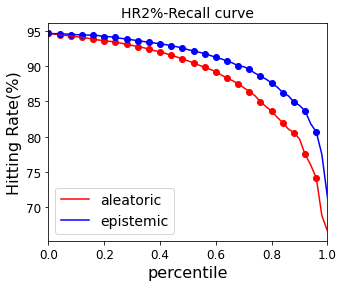

In [6]:
plt.figure(figsize=(5,4))
xaxis = np.linspace(0,1,51)
plt.plot(xaxis, 100-Ua_cali, color='red', label='aleatoric')
plt.plot(xaxis, 100-Um_cali, color='blue', label='epistemic')
plt.scatter(xaxis[0:-1:2], 100-Ua_cali[0:-1:2], color='red')
plt.scatter(xaxis[0:-1:2], 100-Um_cali[0:-1:2], color='blue')
plt.xlim(0,1)
plt.xlabel('percentile', fontsize=16)
plt.ylabel('Hitting Rate(%)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc=3)
plt.title('HR2%-Recall curve',fontsize=14)
#plt.ylim(0,9)
#plt.yscale('log')
plt.savefig('./figs/recall.png', dpi=400, bbox_inches = "tight")
plt.show()

In [ ]:
import math
np.mean((np.exp(2*Uat)/(2*math.pi*math.e))**0.25)

In [ ]:
mr = np.exp(-math.pi*math.e*1*1.17/(np.exp(Uav)))

In [ ]:
print('lower bound of MR-1 is:', np.mean(mr)*100)

In [ ]:
from heatmap_model.utils import *
data = np.load('./results/val_results_f.npz', allow_pickle=True)
H = data['heatmap']

In [ ]:
radius = np.arange(0.5,6.2,0.2)
mr_lb = np.zeros(len(radius))
mr_dnn = np.zeros(len(radius))
for i in range(len(radius)):
    r = radius[i]
    _, MR = ComputeError(Yp[:,1:2],Y, r=r, sh=1)
    mr_lb[i] = np.mean(np.exp(-math.pi*math.e*r*r/(np.exp(Uav))))
    mr_dnn[i] = np.mean(MR)

In [ ]:
r_mid = np.arange(0.5,6.2,0.2)
mr_mid = np.zeros(len(r_mid))
for i in range(len(r_mid)):
    r = r_mid[i]
    print(r,end='\r')
    mr_mid[i] = MR_lim_gpu(H, r)
    print(mr_mid[i])

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(r_mid.min(), r_mid.max(), 20) 

spl = make_interp_spline(r_mid, mr_mid, k=2)  # type: BSpline
mr_smooth = spl(xnew)

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(radius, mr_dnn*100, label='prediction MR',c='green',linewidth=1.3, linestyle='--')
plt.plot(xnew, mr_smooth*100, label='optimal sampling MR',c='blue',linewidth=1.3,linestyle='--')
plt.plot(radius, mr_lb*100, label='MR lower bound',c='black',linewidth=1.3)
plt.xlabel('radius(m)', fontsize=16)
plt.ylabel('MR%', fontsize=16)
plt.xlim(0,6)
plt.ylim(0,100)
plt.grid(color='lightgrey')
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 101, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11, loc=1)
plt.savefig('./figs/lbMR.png', dpi=400, bbox_inches = "tight")
plt.show()

In [ ]:
def ComputeNLL(H, Y):
    nll = np.zeros(len(Y))
    for i in range(len(H)):
        hp = H[i]/np.sum(H[i])
        x, y = Y[i,0], Y[i,1]
        indx, indy = int((x+23)/0.5)+1, int((y+12)/0.5)+1
        nll[i] = -np.log(hp[indx, indy])
    return nll

In [ ]:
nll = ComputeNLL(H, Y)
Uav[Uav<1.5]=1.5

In [ ]:
from scipy.stats import gaussian_kde
fig, ax = plt.subplots(figsize=(5,4))
#xy = np.vstack([Uav,nll])
#z = gaussian_kde(xy)(xy)
ax.scatter(Uav, nll, c=Umv/np.amax(Umv), s=10, alpha=0.3, cmap='rainbow')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, '--', alpha=0.75, zorder=0, label='y=x')
plt.xlim(1.5,6)
plt.ylim(1.5,16)
plt.xlabel('Aleatoric', fontsize=16)
plt.ylabel('NLL Loss', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(fontsize=14, loc=1)
#plt.savefig('./figs/lbNLL.png', dpi=400, bbox_inches = "tight")
plt.show()

In [ ]:
data = np.load('./interaction_merge/test.npz', allow_pickle=True)
T = data['trajectory']
data = np.load('./interaction_merge/val.npz', allow_pickle=True)
Tv = data['trajectory']

In [ ]:
V = np.sqrt(T[:,0,-1,4]**2+ T[:,0,-1,5]**2)
Vv = np.sqrt(Tv[:,0,-1,4]**2+ Tv[:,0,-1,5]**2)

In [ ]:
V_in = np.array([V[i] for i in range(len(V)) if file_id[i] not in [4,5,6,7,8,9]])
#V_st = np.array([V[i] for i in range(len(V)) if file_id[i] in [4,7,8,9]])
V_out = np.array([V[i] for i in range(len(V)) if file_id[i] in [4,5,6,7,8,9]])
#U_out = np.array([Umt[i] for i in range(len(Uat)) if file_id[i] in [7,8]])

In [ ]:
plt.scatter(Vv, Umv, s=0.5, alpha=0.1)
plt.scatter(V_in, Um_in, s=0.5, alpha=0.1)
plt.scatter(V_out, Um_out, s=0.5, alpha=0.1)
plt.ylim(0,1)
plt.show()

In [ ]:
#plt.scatter(Vv, Umv, s=0.5, alpha=0.5)
plt.scatter(V_in, Um_in, s=0.5, alpha=0.5)
#plt.scatter(V_out, Um_out, s=0.5, alpha=0.5)
plt.ylim(0,1)
plt.show()

In [ ]:
#plt.scatter(Vv, Umv, s=0.5, alpha=0.5)
#plt.scatter(V_in, Um_in, s=0.5, alpha=0.5)
plt.scatter(V_out, Um_out, s=0.5, alpha=0.5)
plt.ylim(0,1)
plt.show()

In [ ]:
from scipy.stats import gaussian_kde
fig, ax = plt.subplots(figsize=(5,4))
# xy1 = np.vstack([Vv,Umv])
# z1 = gaussian_kde(xy1)(xy1)
# xy2 = np.vstack([V_in,Um_in])
# z2 = gaussian_kde(xy2)(xy2)
xy3 = np.vstack([V_out,Um_out])
z3 = gaussian_kde(xy3)(xy3)
#ax.scatter(Vv, Umv, c=z1, s=10, alpha=0.3, cmap='rainbow')
#ax.scatter(V_in, Um_in, c=z2, s=10, alpha=0.3, cmap='rainbow')
ax.scatter(V_out, Um_out, c=z3, s=10, alpha=0.3, cmap='rainbow')
plt.xlim(0,30)
plt.ylim(0, 1)
plt.xlabel('Speed(m/s)', fontsize=16)
plt.ylabel('Epistemic(nats)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('OOD')
#ax.legend(fontsize=14, loc=1)
plt.savefig('./figs/v3.png', dpi=400, bbox_inches = "tight")
plt.show()

In [ ]:
os.listdir('./interaction_data/data/test')

In [ ]:
from scipy.special import gamma
np.mean(np.sqrt(np.exp(Uav-1)/np.pi)*gamma(1.5))-0.6*np.sqrt(2)*gamma(1.5)

In [ ]:
np.mean(np.abs(Yp[:,1]-Y))

In [ ]:
np.log(2*math.pi*math.e*0.36)

In [ ]:
Vt = []
for i in range(1,5):
    data = np.load('./interaction_merge/train'+str(i)+'.npz', allow_pickle=True)
    v = np.sqrt(data['trajectory'][:,0,-1,4]**2+data['trajectory'][:,0,-1,5]**2)
    Vt.append(v)
Vt = np.concatenate(Vt,0)

In [ ]:
data = np.load('./interaction_merge/test.npz', allow_pickle=True)
V = np.sqrt(data['trajectory'][:,0,-1,4]**2+data['trajectory'][:,0,-1,5]**2)

In [ ]:
data = np.load('./interaction_merge/val.npz', allow_pickle=True)
Vr = np.sqrt(data['trajectory'][:,0,-1,4]**2+data['trajectory'][:,0,-1,5]**2)

In [ ]:
plt.figure(figsize=(5, 2))
plt.hist(Vt,bins=50, density=True, histtype='step')
#plt.hist(V,bins=50, density=True, histtype='step')
plt.hist(Vr,bins=50, density=True, histtype='step')
plt.title('speed distribution of the training set')
#plt.xlabel('speed (m/s)')
#plt.ylabel('probability density')
plt.xlim(-1, 25)
#plt.savefig('./figs/vtest.jpg', dpi=200, bbox_inches = "tight")
plt.show()

In [ ]:
mse = np.exp(Uav)/2/math.pi/math.e-(0.7)**2

In [ ]:
plt.hist(mse,bins=50, density=True, histtype='step')
plt.show()

In [ ]:
np.amax(mse)

In [ ]:
np.mean(mse)**0.5

In [ ]:
0.55**0.5